In [1]:
# In this notebook I am going to play with input data, compare general statistics about it and see what can be potentially used 
#to find more relevant features which impact rating of restaurants

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils.utils_for_files_storing_and_reading import write_df_to_csv
from utils.functions_for_encoding import drop_columns



In [ ]:
# Initially, the downloaded data has different types of delimiters. All data sets were saved in the correct format in the folder
# clean_data. If the data is already in that folder, some steps can be skippes. Start to run code in 6 and 8 boxes to get the
# data of restaurants and users.

In [2]:
# loading restaurants data
restaurant_payment_types = pd.read_csv('raw_data/chefmozaccepts.csv', delimiter =';')
restaurant_cuisine_types = pd.read_csv('raw_data/chefmozcuisine.csv', delimiter =';')
restaurant_working_hours = pd.read_csv('raw_data/chefmozhours.csv', delimiter =',')
restaurant_parking = pd.read_csv('raw_data/chefmozparking.csv', delimiter =';')
restaurant_geo_places = pd.read_csv('raw_data/geoplaces.csv', delimiter =';', encoding='latin-1')
ratings = pd.read_csv('raw_data/rating_final.csv', delimiter =';')

In [34]:
# Loading users data
# The user data will be used later.
user_payment_types = pd.read_csv('raw_data/userpayment.csv', delimiter =';')
user_cuisine_types = pd.read_csv('raw_data/usercuisine.csv', delimiter =';')
user_profiles = pd.read_csv('raw_data/userprofile.csv', delimiter =';')

In [3]:
# I created new directory with clean .csv files that have unified formatting as input data have different delimiters
write_df_to_csv('clean_data', 'restaurant_payment_types.csv', restaurant_payment_types)
write_df_to_csv('clean_data', 'restaurant_cuisine_types.csv', restaurant_cuisine_types)

# as restaurant_working_hours data set has mixed types of delimiters, I rewrite its columns 'hours' and 'days' to be consistent
#in formatting with the rest of data sets

for i, series in restaurant_working_hours.iterrows():
    hours = restaurant_working_hours.loc[i, 'hours'][0:len(restaurant_working_hours.loc[i, 'hours']) - 1]
    restaurant_working_hours.loc[i, 'hours'] = hours
    hours = restaurant_working_hours.loc[i, 'days'][0:len(restaurant_working_hours.loc[i, 'days']) - 1]
    restaurant_working_hours.loc[i, 'days'] = hours

write_df_to_csv('clean_data', 'restaurant_working_hours.csv', restaurant_working_hours)
write_df_to_csv('clean_data', 'restaurant_parking_types.csv', restaurant_parking)
write_df_to_csv('clean_data', 'restaurant_geo_places.csv', restaurant_geo_places)
write_df_to_csv('clean_data', 'restaurant_ratings.csv', ratings)

In [39]:
#All restaurant related data in the correct format will be used for the further analysis.
r_payment = pd.read_csv('clean_data/restaurant_payment_types.csv')
r_cuisine = pd.read_csv('clean_data/restaurant_cuisine_types.csv')
r_hours = pd.read_csv('clean_data/restaurant_working_hours.csv')
r_parking = pd.read_csv('clean_data/restaurant_parking_types.csv')
r_general = pd.read_csv('clean_data/restaurant_geo_places.csv')
ratings = pd.read_csv('clean_data/restaurant_ratings.csv')

In [41]:
# Here I also save clean user data frames with default delimiter=','. 
write_df_to_csv('clean_data', 'user_payment_types.csv', user_payment_types)
write_df_to_csv('clean_data', 'user_cuisine_types.csv', user_cuisine_types)
write_df_to_csv('clean_data', 'user_profiles.csv', user_profiles)

In [44]:
# All user related data in the correct format will be used for the further analysis.
u_payment = pd.read_csv('clean_data/user_payment_types.csv')
u_cuisine = pd.read_csv('clean_data/user_cuisine_types.csv')
u_profiles = pd.read_csv('clean_data/user_profiles.csv')

In [46]:
#Some rows in the data have the same value but written in a different format, e.g. 'VISA' vs 'Visa'. 
r_payment['Rpayment'].unique()

array(['cash', 'VISA', 'MasterCard-Eurocard', 'American_Express',
       'bank_debit_cards', 'checks', 'Discover', 'Carte_Blanche',
       'Diners_Club', 'Visa', 'Japan_Credit_Bureau', 'gift_certificates'],
      dtype=object)

In [47]:
#I will use the below functions to correct the data.
def lowercase(df, *columns):
    for column in columns:
        df[column] = df[column].str.lower()

In [48]:
# The cuisine data
# There are no duplictes or some values which can be merged so I leave it like it is.
lowercase(r_cuisine, 'Rcuisine')
sorted(r_cuisine['Rcuisine'].unique())

['afghan',
 'african',
 'american',
 'armenian',
 'asian',
 'bagels',
 'bakery',
 'bar',
 'bar_pub_brewery',
 'barbecue',
 'brazilian',
 'breakfast-brunch',
 'burgers',
 'cafe-coffee_shop',
 'cafeteria',
 'california',
 'caribbean',
 'chinese',
 'contemporary',
 'continental-european',
 'deli-sandwiches',
 'dessert-ice_cream',
 'diner',
 'dutch-belgian',
 'eastern_european',
 'ethiopian',
 'family',
 'fast_food',
 'fine_dining',
 'french',
 'game',
 'german',
 'greek',
 'hot_dogs',
 'international',
 'italian',
 'japanese',
 'juice',
 'korean',
 'latin_american',
 'mediterranean',
 'mexican',
 'mongolian',
 'organic-healthy',
 'persian',
 'pizzeria',
 'polish',
 'regional',
 'seafood',
 'soup',
 'southern',
 'southwestern',
 'spanish',
 'steaks',
 'sushi',
 'thai',
 'turkish',
 'vegetarian',
 'vietnamese']

In [49]:
# Extracting how many cuisine types exist in restaurants
print(f"Number of unique restaurants with cuisine type specified:{len(r_cuisine['placeID'].unique())}")
print(f"Number of cuisine types:{len(r_cuisine['Rcuisine'].unique())}")

Number of unique restaurants with cuisine type specified:769
Number of cuisine types:59


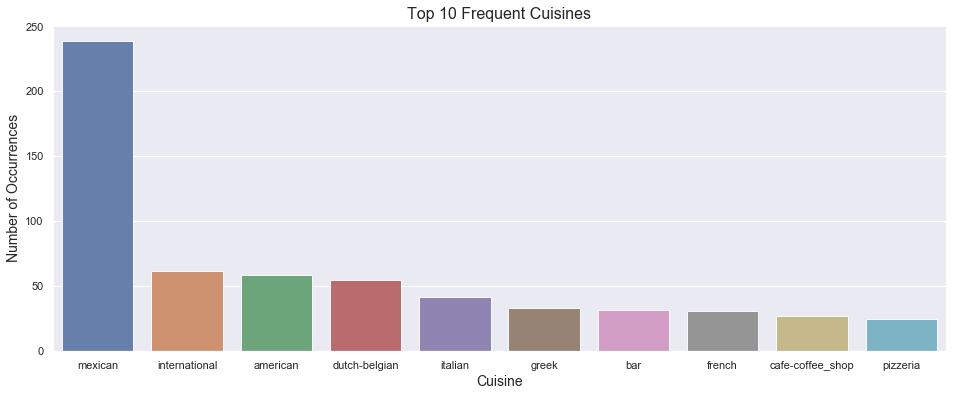

In [50]:
#The barplot for cuisine. 
# As there are 59 different types of cuisine, I will display top 10 by frequency. The survey was conducted in Mexico, so no
#surprise the most frequent cuisine is Mexican.

cuisine_count = r_cuisine['Rcuisine'].value_counts()
plt.figure(figsize=(16, 6))
sns.set(style="darkgrid")
sns.barplot(cuisine_count.index[:10], cuisine_count.values[:10], alpha=0.9)
plt.title('Top 10 Frequent Cuisines', fontsize = 16)
plt.ylabel('Number of Occurrences', fontsize=14)
plt.xlabel('Cuisine', fontsize=14)
plt.show()

In [51]:
#The parking data
#There are no duplictes or some values which can be merged so I leave it like it is.
lowercase(r_parking, 'parking_lot')
sorted(r_parking['parking_lot'].unique())

['fee',
 'none',
 'public',
 'street',
 'valet parking',
 'validated parking',
 'yes']

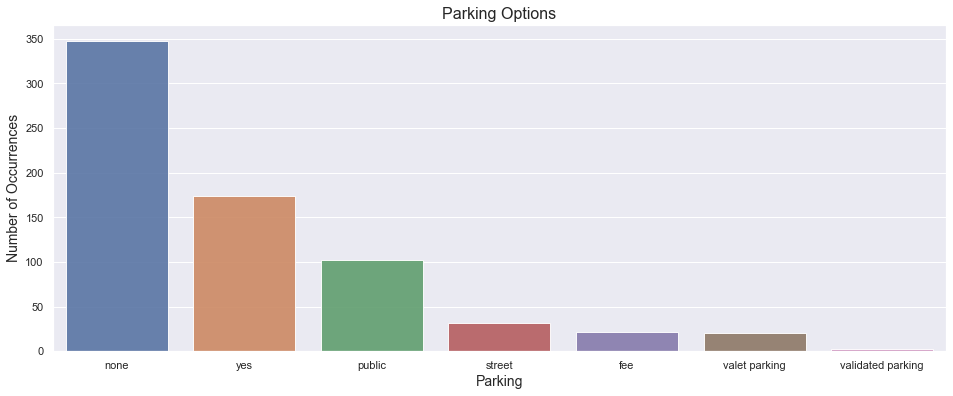

In [52]:
#The barplot for parking
# Almost 350 restaurant do not have a parking option. I will check whether the parking plays a signigicant role for a rating. If
#so, a restaurant might include it in their services to increase its rating.
parking_count = r_parking['parking_lot'].value_counts()
plt.figure(figsize=(16, 6))
sns.set(style="darkgrid")
sns.barplot(parking_count.index, parking_count.values, alpha=0.9)
plt.title('Parking Options', fontsize = 16)
plt.ylabel('Number of Occurrences', fontsize=14)
plt.xlabel('Parking', fontsize=14)
plt.show()

In [53]:
#The payment data
#'Visa' was changed to 'visa/ There are no more duplictes or some values which can be merged so I leave it like it is.
lowercase(r_payment, 'Rpayment')
sorted(r_payment['Rpayment'].unique())

['american_express',
 'bank_debit_cards',
 'carte_blanche',
 'cash',
 'checks',
 'diners_club',
 'discover',
 'gift_certificates',
 'japan_credit_bureau',
 'mastercard-eurocard',
 'visa']

In [54]:
# As there are many options to pay in restaurants, firstly, I will check what options are the most frequent. 
r_payment['Rpayment'].value_counts()

cash                   500
visa                   255
mastercard-eurocard    194
american_express       153
bank_debit_cards       130
diners_club             42
discover                11
checks                  10
gift_certificates        7
carte_blanche            7
japan_credit_bureau      5
Name: Rpayment, dtype: int64

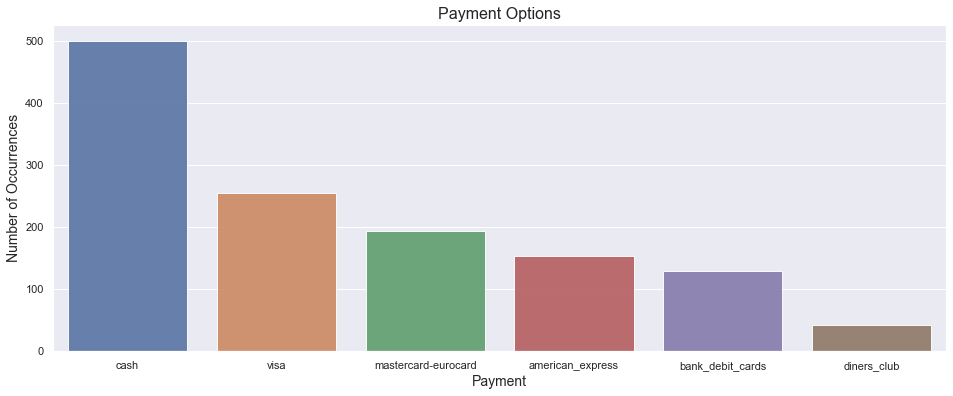

In [55]:
#The bar plot for payment
payment_count = r_payment['Rpayment'].value_counts()
plt.figure(figsize=(16, 6))
sns.set(style="darkgrid")
sns.barplot(payment_count.index[:6], payment_count.values[:6], alpha=0.9)
plt.title('Payment Options', fontsize=16)
plt.ylabel('Number of Occurrences', fontsize=14)
plt.xlabel('Payment', fontsize=14)
plt.show()

In [56]:
#The working schedule data
lowercase(r_hours, 'days')
r_hours['hours'].value_counts()


00:00-23:30    681
00:00-00:00    100
17:00-22:00     56
14:00-23:30     32
09:00-23:30     31
              ... 
07:00-13:00      1
20:30-23:30      1
06:00-18:00      1
10:00-03:30      1
19:00-00:30      1
Name: hours, Length: 273, dtype: int64

In [57]:
#There are 273 different shifts over three type of working days. Many working hours are intersected with each other. As there 
#are many different options of working hours of restaurants, it's been decided not to consider this variable. If a client 
#evaluated a restaurant, it assumes he attended it and the working shift is not an issue for the client. Moreover,the data does
#not state what hours are more profitable for a restaurant and it's not clear how it can be evaluated. 

pd.pivot_table(r_hours, values = ['hours'], index = 'hours', columns = 'days',aggfunc = 'count')

placeID              
days        mon;tue;wed;thu;fri    sat    sun
hours                                        
00:00-00:00                24.0   27.0   49.0
00:00-23:30               213.0  225.0  243.0
01:00-01:00                 NaN    1.0    NaN
01:00-20:30                 1.0    NaN    NaN
01:00-23:30                 NaN    1.0    1.0
...                         ...    ...    ...
21:30-13:00                 2.0    2.0    2.0
21:30-19:00                 2.0    NaN    NaN
21:30-21:00                 2.0    2.0    2.0
21:30-22:00                 2.0    2.0    2.0
21:30-23:00                 2.0    2.0    NaN

[273 rows x 3 columns]

In [58]:
#The general data
#Some columns in the r_general will be removed. Those columns, in my opinion, will not affect the 
#rating and/or the visualization of those columns is irrelevant and does not shed a light on the data.
r_general = drop_columns(r_general, 'latitude', 'longitude', 'the_geom_meter', 'address',
             'fax','zip','url', 'name')
lowercase(r_general, 'city', 'state', 'country', 'alcohol', 'smoking_area', 
          'dress_code', 'accessibility', 'price', 'Rambience', 'franchise', 'area', 
          'other_services')

In [59]:
# I will check the remaining columns and decide how to deal with them. I will start from country.
r_general['country'].value_counts()

mexico    102
?          28
Name: country, dtype: int64

In [60]:
# Mexico is a country for the mojrity of restaurants. Some restaurants with a missing country still have state and/or city 
# indicatiting it's still Mexico. A few records have neither country nor state nor city. Nevertheless, it does notmater as the
# survey was conducted for Mexican restaurants. As this value is the same for all places, the column 'country' will be dropped 
# from the dataset.
r_general = drop_columns(r_general,'country')

In [61]:
# When checking state, some values caught my attention. It's slp, san luis potosi, s.l.p., san luis potos. They all refer to one
# state San Luis Potose. I decided to replcase all those values by 'san luis potosi'. '?' were replaced by 'Nan'

print(r_general['state'].value_counts())

r_general['state'] = r_general['state'].replace(['slp', 'san luis potosi', 's.l.p.', 'san luis potos'],'san luis potosi')
r_general['state'] = r_general['state'].replace('?', 'Nan')

print(f"\n{r_general['state'].value_counts()}")

slp                52
morelos            20
?                  18
san luis potosi    18
tamaulipas         16
s.l.p.              3
mexico              2
san luis potos      1
Name: state, dtype: int64

san luis potosi    74
morelos            20
Nan                18
tamaulipas         16
mexico              2
Name: state, dtype: int64


In [62]:
# Some city values can be merged like it was done for the 'state'. '?' were replaced by 'Nan'. You can see how the column 'city'
# chnaged after the replacement.

print(r_general['city'].value_counts())

r_general['city'] = r_general['city'].replace(['san luis potosi', 'slp', 's.l.p.', 's.l.p', 'san luis potos','san luis potosi '],'san luis potosi')
r_general['city'] = r_general['city'].replace(['victoria', 'victoria ', 'ciudad victoria', 'cd victoria', 'cd. victoria'],
                                              'ciudad victoria')
r_general['city'] = r_general['city'].replace('?', 'Nan')

print(f"\n{r_general['city'].value_counts()}")

san luis potosi     69
?                   18
cuernavaca          16
victoria            10
jiutepec             4
ciudad victoria      2
soledad              2
victoria             2
s.l.p                1
san luis potosi      1
san luis potos       1
s.l.p.               1
cd. victoria         1
slp                  1
cd victoria          1
Name: city, dtype: int64

san luis potosi    74
Nan                18
ciudad victoria    16
cuernavaca         16
jiutepec            4
soledad             2
Name: city, dtype: int64


In [63]:
# The column 'alcohol' won't be changed.  
r_general['alcohol'].value_counts()

no_alcohol_served    87
wine-beer            34
full_bar              9
Name: alcohol, dtype: int64

In [64]:
# The column 'smoking_area'
# I checked what options are in the smoking_area column. I deciced to have two categories:
# 1)not permitted (none, not permitted) and 2) permitted(only at bar, section, permitted)
print(r_general['smoking_area'].value_counts())
r_general['smoking_area'] = r_general['smoking_area'].replace(['none'],'not permitted')
r_general['smoking_area'] = r_general['smoking_area'].replace(['only at bar', 'section'],'permitted')
print(f"\n{r_general['smoking_area'].value_counts()}")
      
# I assume smoking_area and alcolhol will play a siginifican role for a rating. This can be a decisive factor when choosing and 
# evaluating a restaurant, especially for smokers and/or people who refuse to go to a restaurant if they don’t serve alcohol.
# It's good there are different options for those two variables. The majority of restaurants do not serve alcohol and do not
# permit smoking. It is interesting to check whether the lack of the options decreases the rating of a restaurant or 
# clients do not consider them as important factors.

none             70
not permitted    25
section          24
permitted         9
only at bar       2
Name: smoking_area, dtype: int64

not permitted    95
permitted        35
Name: smoking_area, dtype: int64


In [65]:
# The column 'dress_code'
# I decided to unite informal and casual and eventually have only two options for dress_code: informal and formal.

print(r_general['dress_code'].value_counts())
r_general['dress_code'] = r_general['dress_code'].replace(['casual'],'informal')
print(f"\n{r_general['dress_code'].value_counts()}")
      
# There are only 2 restaurants with formal clothes. I might drop this column for the further analysis as there is no sense to 
# have this variable when it's the same for 128 restaurant.

informal    118
casual       10
formal        2
Name: dress_code, dtype: int64

informal    128
formal        2
Name: dress_code, dtype: int64


In [66]:
#The values of rest columns from r_general. After checking the values, I decided not to change them.
print(f"\nThe options of accessibility are: \n{r_general['accessibility'].value_counts()}")
print(f"\nThe options of price are: \n{r_general['price'].value_counts()}")
print(f"\nThe options of Rambience are: \n{r_general['Rambience'].value_counts()}")
print(f"\nThe options of franchise are: \n{r_general['franchise'].value_counts()}")
print(f"\nThe options of area are: \n{r_general['area'].value_counts()}")
print(f"\nThe options of other_services are: \n{r_general['other_services'].value_counts()}")


The options of accessibility are: 
no_accessibility    76
completely          45
partially            9
Name: accessibility, dtype: int64

The options of price are: 
medium    60
low       45
high      25
Name: price, dtype: int64

The options of Rambience are: 
familiar    121
quiet         9
Name: Rambience, dtype: int64

The options of franchise are: 
f    108
t     22
Name: franchise, dtype: int64

The options of area are: 
closed    115
open       15
Name: area, dtype: int64

The options of other_services are: 
none        119
variety       7
internet      4
Name: other_services, dtype: int64


In [67]:
# Barplots for r_general. 
# As there are many categories in this dataset, I decided to write the general function to get the plot for "X' column from
# r_general.
def plot_general(column):
    count = r_general[column].value_counts()
    plt.figure(figsize=(16, 6))
    sns.set(style="darkgrid")
    sns.barplot(count.index, count.values, alpha=0.9)
    plt.title(f'{column.title()} Options', fontsize = 16)
    plt.ylabel('Number of Occurrences', fontsize=14)
    plt.xlabel(f'{column.title()}', fontsize=14)
    plt.show()  

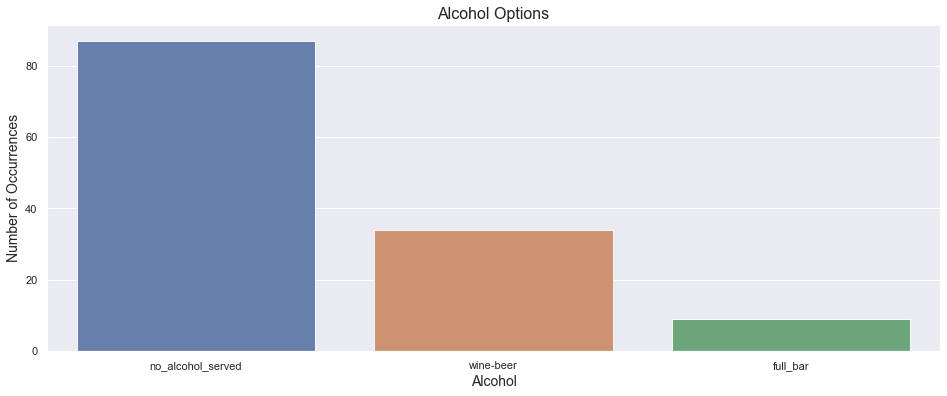

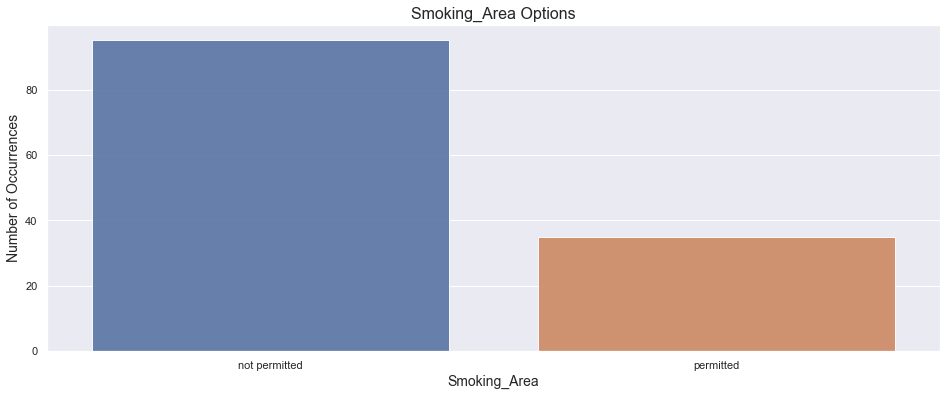

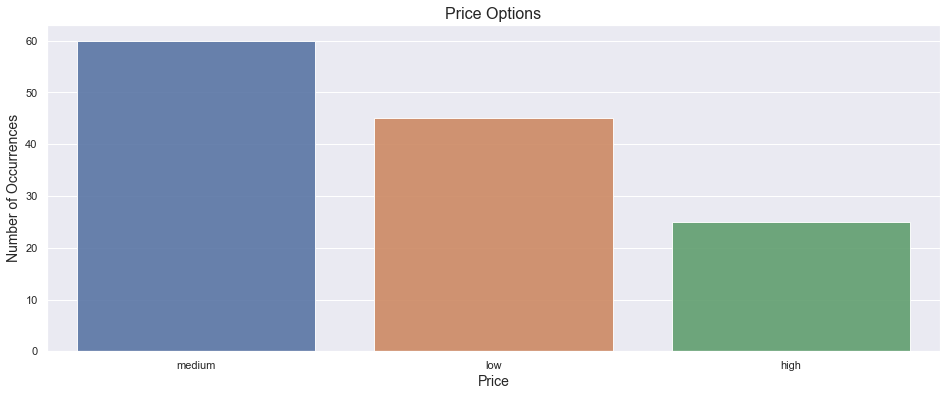

In [68]:
plot_general('alcohol')
plot_general('smoking_area')
plot_general('price')

# if needed, it's possible to make a bar plot for any variable. I checked three of them.

     placeID    rating  food_rating  service_rating
0     132560  0.500000     1.000000        0.250000
1     132561  0.750000     1.000000        1.000000
2     132564  1.250000     1.250000        1.500000
3     132572  1.000000     1.000000        0.933333
4     132583  1.000000     1.000000        1.250000
..       ...       ...          ...             ...
125   135088  1.000000     1.166667        1.000000
126   135104  0.857143     1.428571        0.857143
127   135106  1.200000     1.200000        1.200000
128   135108  1.181818     1.181818        1.000000
129   135109  1.000000     1.250000        0.750000

[130 rows x 4 columns]
           rating  food_rating  service_rating
count  130.000000   130.000000      130.000000
mean     1.179622     1.213914        1.085800
std      0.349354     0.339270        0.334026
min      0.250000     0.250000        0.250000
25%      1.000000     1.000000        0.904167
50%      1.181818     1.244048        1.000000
75%      1.400000     1

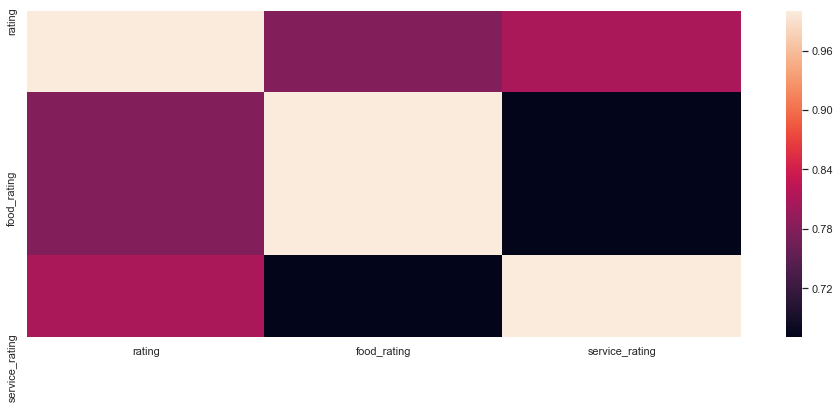

In [69]:
# Rating dataset
# I decided to check the correlation between different rating from ratings dataset. I created a new dataframe to see the average
# rating of each rating grouped by placeID. I got a table of 130 restaurants with their ratings.
rating_mean = ratings.groupby('placeID')['rating', 'food_rating', 'service_rating'].mean().reset_index()
print(rating_mean)

print(rating_mean.iloc[:,1:].describe())

correlation = rating_mean.iloc[:,1:].corr()
plt.figure(figsize=(16, 6))
sns.heatmap(correlation)

print(f'\nThe rating correlation: \n{correlation}')

# I assume rating and service_rating will be affected by the same variables.

In [70]:
#I saved the clean data sets + rating dataset (to have all sets in one folder) to csv files which will be used later.
write_df_to_csv('from_data_visualization', 'restaurant_cuisine.csv', r_cuisine)
write_df_to_csv('from_data_visualization', 'restaurant_general.csv', r_general)
write_df_to_csv('from_data_visualization', 'restaurant_hours.csv', r_hours)
write_df_to_csv('from_data_visualization', 'restaurant_parking.csv', r_parking)
write_df_to_csv('from_data_visualization', 'restaurant_payment.csv', r_payment)
write_df_to_csv('from_data_visualization', 'ratings.csv', ratings)
write_df_to_csv('from_data_visualization', 'rating_mean.csv', rating_mean)

In [30]:
# Here I want to merge data of restaurants from different data sets by placeID with ratings and see how different features 
# affect a rating. I will continue to work with the clean datasets. 
# As I saved clean data sets, I can use those sets any time I need it.

# I will merge the rating dataset with other frames and then display the data on bar charts. I want to see how rating is
# different depending on column values. For this, I am creating the list of rating which will be used for bar charts +
# addiitonal fixed arguments used for all plots.
subjects = ['rating', 'food_rating', 'service_rating']
indx = np.arange(len(subjects))
bar_width = 0.25

# As the scale of rating is narrow [0,2], I want to see the numbers of a rating on the plot. To do this, the following
# function will be used.

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.3f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


In [71]:
# Parking and Rating data sets
parking_rating = pd.merge(rating_mean,r_parking,on = 'placeID', how = 'left')
df_bar_plot = parking_rating.groupby('parking_lot')[subjects].mean().T

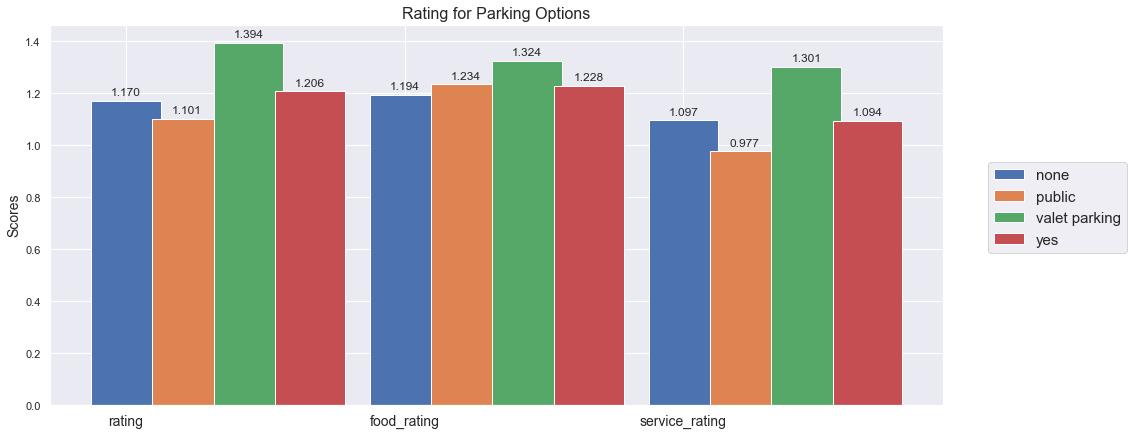

In [32]:
# Parking and Rating plot
fig, ax = plt.subplots(figsize = (16,7))
rects1 = plt.bar(indx + 0.00, df_bar_plot.iloc[:,0],bar_width, label = 'none')
rects2 = plt.bar(indx + 0.22, df_bar_plot.iloc[:,1],bar_width, label = 'public')
rects3 = plt.bar(indx + 0.44, df_bar_plot.iloc[:,2],bar_width, label = 'valet parking')
rects4 = plt.bar(indx + 0.66, df_bar_plot.iloc[:,3],bar_width, label = 'yes')

ax.set_ylabel('Scores', fontsize = 14)
ax.set_title('Rating for Parking Options', fontsize = 16)
ax.set_xticks(indx)
ax.set_xticklabels(subjects, fontsize = 14)
ax.legend(fontsize = 15, loc = (1.05, 0.4))

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)


plt.show()



In [36]:
# I already know there are 130 restaurants which were evaluated by users. I want to know the number of users who gave the rating.

def find_unique_records_number_by_column(column, *data_frames):
    data_frames_columns = [df[column] for df in data_frames]
    concatenated_column_values = np.concatenate(data_frames_columns)
    return np.unique(concatenated_column_values)

all_users_ids = find_unique_records_number_by_column(
    'userID',
    user_payment_types,
    user_cuisine_types,
    user_profiles
)

print(f"The number of users: {len(all_users_ids)}")

The number of users: 138


In [77]:
# There are 138 users I have the data about. Not all of them might evaluate restaurants. Firstly, I will clean the uder data like ti was done for
# the restaurant data. 

#The user_profile data
u_profiles.head()

,userID,latitude,longitude,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,birth_year,interest,personality,religion,activity,color,weight,budget,height
0,U1001,22.139997,-100.978803,FALSE,abstemious,informal,family,on foot,single,independent,1989,variety,thrifty-protector,none,student,black,69,medium,1.77
1,U1002,22.150087,-100.983325,FALSE,abstemious,informal,family,public,single,independent,1990,technology,hunter-ostentatious,Catholic,student,red,40,low,1.87
2,U1003,22.119847,-100.946527,FALSE,social drinker,formal,family,public,single,independent,1989,none,hard-worker,Catholic,student,blue,60,low,1.69
3,U1004,18.867000,-99.183000,FALSE,abstemious,informal,family,public,single,independent,1940,variety,hard-worker,none,professional,green,44,medium,1.53
4,U1005,22.183477,-100.959891,FALSE,abstemious,no preference,family,public,single,independent,1992,none,thrifty-protector,Catholic,student,black,65,medium,1.69


In [81]:
# drop redundant columns from u_profiles
u_profiles = drop_columns(u_profiles, 'latitude', 'longitude', 'birth_year', 'color', 'weight', 'height')


In [82]:
u_profiles.head()

,userID,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,interest,personality,religion,activity,budget
0,U1001,FALSE,abstemious,informal,family,on foot,single,independent,variety,thrifty-protector,none,student,medium
1,U1002,FALSE,abstemious,informal,family,public,single,independent,technology,hunter-ostentatious,Catholic,student,low
2,U1003,FALSE,social drinker,formal,family,public,single,independent,none,hard-worker,Catholic,student,low
3,U1004,FALSE,abstemious,informal,family,public,single,independent,variety,hard-worker,none,professional,medium
4,U1005,FALSE,abstemious,no preference,family,public,single,independent,none,thrifty-protector,Catholic,student,medium


In [84]:
lowercase(u_profiles, 'smoker', 'drink_level', 'dress_preference', 'ambience', 'transport', 'marital_status', 'hijos', 
          'interest', 'personality', 'religion', 'activity', 'budget')


In [95]:
# I am going to check values in each column and check if some values can be combined or need to be replaced. 
print(f"\n{u_profiles['smoker'].value_counts()}")
print(f"\n{u_profiles['drink_level'].value_counts()}")
print(f"\n{u_profiles['dress_preference'].value_counts()}")
print(f"\n{u_profiles['ambience'].value_counts()}")
print(f"\n{u_profiles['transport'].value_counts()}")
print(f"\n{u_profiles['marital_status'].value_counts()}")
print(f"\n{u_profiles['hijos'].value_counts()}") 
print(f"\n{u_profiles['interest'].value_counts()}")
print(f"\n{u_profiles['personality'].value_counts()}")
print(f"\n{u_profiles['religion'].value_counts()}")
print(f"\n{u_profiles['activity'].value_counts()}")
print(f"\n{u_profiles['budget'].value_counts()}")


false    109
true      26
?          3
Name: smoker, dtype: int64

abstemious        51
casual drinker    47
social drinker    40
Name: drink_level, dtype: int64

no preference    53
formal           41
informal         35
?                 5
elegant           4
Name: dress_preference, dtype: int64

family      70
friends     46
solitary    16
?            6
Name: ambience, dtype: int64

public       82
car owner    35
on foot      14
?             7
Name: transport, dtype: int64

single     122
married     10
?            4
widow        2
Name: marital_status, dtype: int64

independent    113
?               11
kids            11
dependent        3
Name: hijos, dtype: int64

variety         50
technology      36
none            30
eco-friendly    16
retro            6
Name: interest, dtype: int64

hard-worker            61
thrifty-protector      58
hunter-ostentatious    12
conformist              7
Name: personality, dtype: int64

catholic     99
none         30
christian     7
morm

In [98]:
# After analyzyng the above result, I decided to replace some values to reduce the number of options.
u_profiles['dress_preference'] = u_profiles['dress_preference'].replace(['formal','elegant'], 'formal')
u_profiles['transport'] = u_profiles['transport'].replace(['public','on foot'], 'not car owner')
u_profiles['marital_status'] = u_profiles['marital_status'].replace(['single','widow'], 'not married')
u_profiles['hijos'] = u_profiles['hijos'].replace(['kids','dependent'], 'with kids') #hijos means children
u_profiles['hijos'] = u_profiles['hijos'].replace(['independent'], 'without kids')


In [100]:
# Payment User data
lowercase(u_payment, 'Upayment')
print(f"\n{u_payment['Upayment'].value_counts()}")


cash                   131
bank_debit_cards        22
visa                    17
mastercard-eurocard      4
american_express         3
Name: Upayment, dtype: int64


In [101]:
# Cuisine User data
lowercase(u_cuisine, 'Rcuisine')
sorted(u_cuisine['Rcuisine'].unique())

['afghan',
 'african',
 'american',
 'armenian',
 'asian',
 'australian',
 'austrian',
 'bagels',
 'bakery',
 'bar',
 'bar_pub_brewery',
 'barbecue',
 'basque',
 'brazilian',
 'breakfast-brunch',
 'british',
 'burgers',
 'burmese',
 'cafe-coffee_shop',
 'cafeteria',
 'cajun-creole',
 'california',
 'cambodian',
 'canadian',
 'caribbean',
 'chilean',
 'chinese',
 'contemporary',
 'continental-european',
 'cuban',
 'deli-sandwiches',
 'dessert-ice_cream',
 'dim_sum',
 'diner',
 'doughnuts',
 'dutch-belgian',
 'eastern_european',
 'eclectic',
 'ethiopian',
 'family',
 'fast_food',
 'filipino',
 'fine_dining',
 'french',
 'fusion',
 'game',
 'german',
 'greek',
 'hawaiian',
 'hot_dogs',
 'hungarian',
 'indian-pakistani',
 'indigenous',
 'indonesian',
 'international',
 'irish',
 'israeli',
 'italian',
 'jamaican',
 'japanese',
 'juice',
 'korean',
 'kosher',
 'latin_american',
 'lebanese',
 'malaysian',
 'mediterranean',
 'mexican',
 'middle_eastern',
 'mongolian',
 'moroccan',
 'north_afr

In [102]:
# Some values are ambigious and it's unclear how they can affect the rating. However, there might be a storng correlation between
# some restaurants and users feaures, e.g. smoking_area of a restaurant and smoker of a user. I will check how those features
# are dependent on each other. 

In [121]:
# Merging rating and smoking details of restaurants and users
smoking_df = pd.merge(pd.merge(ratings,  r_general[['placeID', 'smoking_area']], on = 'placeID', how = 'left'),
                      u_profiles[['userID', 'smoker']], on = 'userID', how = 'left')


In [122]:
# Mean rating grouped by users, smoker, and smoking_area
smoking_rating_mean = smoking_df.groupby(['userID', 'smoker', 'smoking_area'])['rating', 'service_rating'].mean().reset_index()

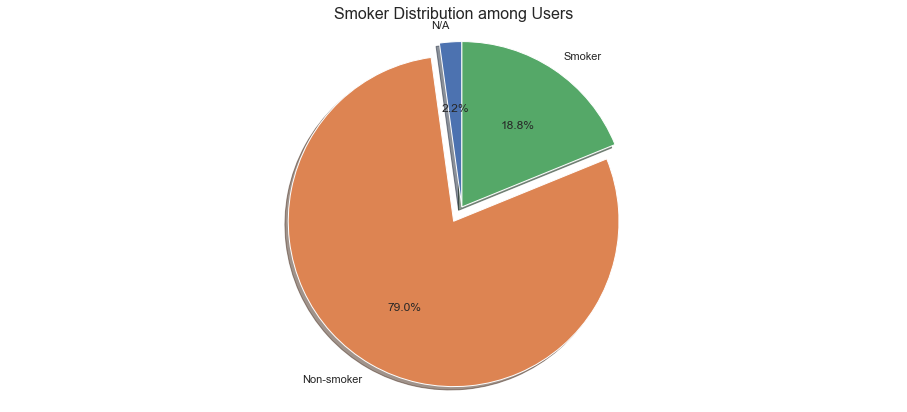

In [123]:
# How many smokers and non-smokers among users
counts = smoking_rating_mean.groupby('smoker')['userID'].nunique()
labels = ['N/A', 'Non-smoker', 'Smoker']
fig1, ax1 = plt.subplots(figsize = (16,7))
plt.title("Smoker Distribution among Users", fontsize = 16)
explode = (0,0.1,0)
ax1.pie(counts,explode = explode, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 90)
ax1.axis('equal')
plt.show()

In [124]:
smoking_stats = pd.pivot_table(smoking_rating_mean, values = ['rating', 'service_rating'], index = 'smoking_area', 
               columns = 'smoker',aggfunc = 'mean')

print(smoking_stats )
# I am doing this as there were only one variable, i.e. smoking area, affecting the rating. It's for simplicity only and to check
# how smoking_area affects users' rating. For this variabe, I consider rating and service rating although they are highly correlated.
# As per below table, I assume smoking_area might have an impact on the rating but along with other variables.
# Only after the model implementation I can state whether there is an evidence this variable affects the result or not.

                 rating                     service_rating                    
smoker                ?     false      true              ?     false      true
smoking_area                                                                  
not permitted  1.078704  1.167469  1.143975       0.842593  1.061540  1.160111
permitted      1.666667  1.247279  1.211905       1.291667  1.113435  1.119048


In [125]:
# Merging rating and drinking details of restaurants and users
drinking_df  = pd.merge(pd.merge(ratings,  r_general[['placeID', 'alcohol']], on = 'placeID', how = 'left'),
                      u_profiles[['userID', 'drink_level']], on = 'userID', how = 'left')

# Mean rating grouped by users, alcohol, and drink_level
drinking_rating_mean = drinking_df.groupby(['userID', 'alcohol', 'drink_level'])['rating', 'food_rating',
                                                                                 'service_rating'].mean().reset_index()


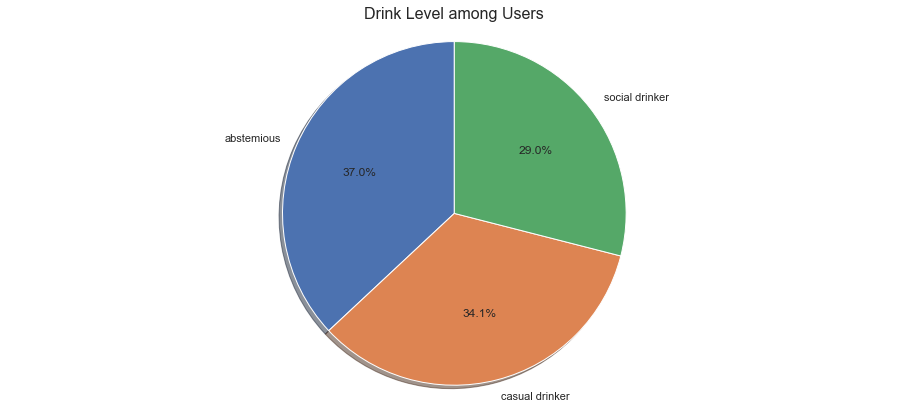

In [126]:
# Drink_level stats
counts = drinking_rating_mean.groupby('drink_level')['userID'].nunique()
labels = ['abstemious', 'casual drinker', 'social drinker']
fig1, ax1 = plt.subplots(figsize = (16,7))
plt.title("Drink Level among Users", fontsize = 16)
explode = (0,0,0)
ax1.pie(counts,explode = explode, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 90)
ax1.axis('equal')
plt.show()

In [127]:
drinking_stats = pd.pivot_table(drinking_rating_mean, values = ['rating', 'food_rating','service_rating'], index = 'alcohol', 
               columns = 'drink_level',aggfunc = 'mean')

print(drinking_stats)


                  food_rating                                   rating  \
drink_level        abstemious casual drinker social drinker abstemious   
alcohol                                                                  
full_bar             1.204545       1.017857       1.300000   1.113636   
no_alcohol_served    1.305268       0.954047       1.438948   1.218075   
wine-beer            1.388095       1.016667       1.413131   1.376455   

                                                service_rating                 \
drink_level       casual drinker social drinker     abstemious casual drinker   
alcohol                                                                         
full_bar                1.125000       1.500000       0.954545       1.160714   
no_alcohol_served       1.015213       1.338560       1.017834       0.888192   
wine-beer               1.080983       1.313636       1.240212       1.017308   

                                  
drink_level       social drinker 

In [128]:
# How budget and price affect the rating
# Merging rating and budget/price details of restaurants and users
budget_df  = pd.merge(pd.merge(ratings,  r_general[['placeID', 'price']], on = 'placeID', how = 'left'),
                      u_profiles[['userID', 'budget']], on = 'userID', how = 'left')
budget_rating_mean = budget_df.groupby(['userID', 'price', 'budget'])['rating', 'food_rating',
                                          'service_rating'].mean().reset_index()

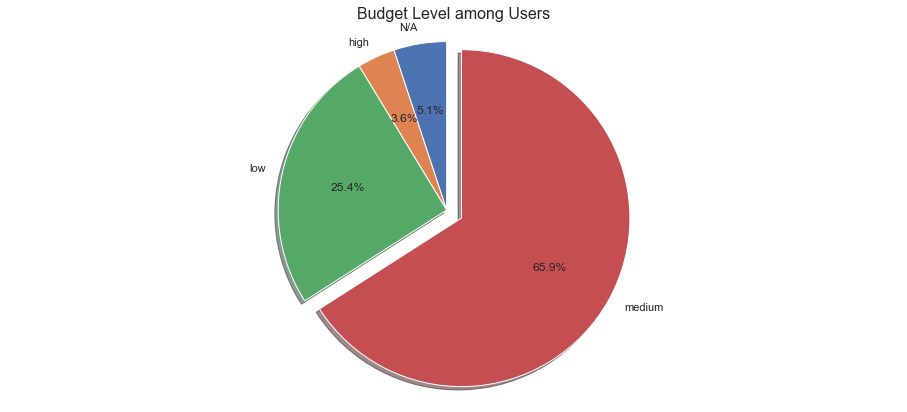

In [129]:
# Budget stats
counts = budget_rating_mean.groupby('budget')['userID'].nunique()
labels = ['N/A', 'high', 'low', 'medium']
fig1, ax1 = plt.subplots(figsize = (16,7))
plt.title("Budget Level among Users", fontsize = 16)
explode = (0,0,0,0.1)
ax1.pie(counts,explode = explode, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 90)
ax1.axis('equal')
plt.show()

In [130]:
budget_stats = pd.pivot_table(budget_rating_mean, values = ['rating', 'food_rating','service_rating'], index = 'price', 
               columns = 'budget',aggfunc = 'mean')

print(budget_stats)
# As expected the lowest rating is for low pice restaurants, especially for service_raiting among users of all budget types.

       food_rating                                  rating            \
budget           ?      high       low    medium         ?      high   
price                                                                  
high      1.600000  1.500000  1.105333  1.296186  1.550000  1.250000   
low       0.964286  1.650000  1.108333  1.179412  1.107143  1.450000   
medium    1.124263  1.751429  1.164773  1.263393  1.095465  1.661429   

                           service_rating                                
budget       low    medium              ?      high       low    medium  
price                                                                    
high    1.113333  1.380932       1.266667  1.291667  1.136667  1.222881  
low     1.139216  1.104062       0.821429  0.983333  0.929902  0.950000  
medium  1.183163  1.231814       1.040136  1.670000  1.115283  1.135074  


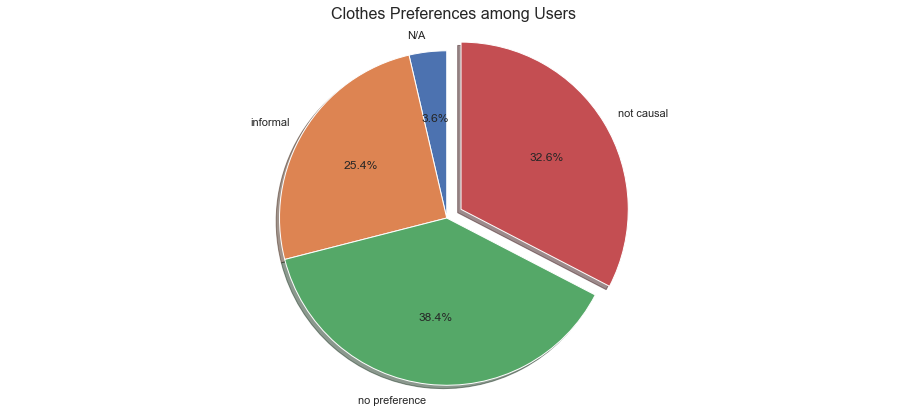

In [132]:
# There are too many variations that can be checked, including > 2 variables from both restaurants and users data. It can be done
# through more profound analysis basing not only on numbers but also on assumptions knowing business area.

# I will not check all of them. The above graphs can be used for better understanding of your clients profiles. If the majority
# of clients are smokers, a restaurant's owner might dig deeper into the smoking_area options to check what they prefer more: 
# separate section, at bar, or something else. 

# A restaurant's owner might consider to differentiate the restaurant from others by changing a few restaurants features so 
# clients will prefer his restaurant over others. For example, among 130 restaurants, only 2 restaurants requires formal dress 
# code, whereas the rest is for informal - I suppose formal clothes is accepted as well. According to the users' profiles 32.6%
# people prefer elegant or formal clothes, which I merge into one group 'not casual'. If there were more restaurants with formal
# dress code, it could be analyzed whether such restaurants receive higher rating as it is considered a higher level in comparison
# to others. To make such a business decision, it's relaly needed to know the industry and how it works, but the data can help
# with this. 

user_clothes_df = u_profiles[['userID', 'dress_preference']]
clothes_counts = user_clothes_df.groupby('dress_preference')['userID'].nunique()
labels = ['N/A', 'informal', 'no preference', 'not causal']
fig1, ax1 = plt.subplots(figsize = (16,7))
plt.title("Clothes Preferences among Users", fontsize = 16)
explode = (0,0,0,0.1)
ax1.pie(clothes_counts,explode = explode, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 90)
ax1.axis('equal')
plt.show()

In [134]:
# The above example is more when business and statistics should work together to make a decision. As I am not aware of nuances of
# this industry, I cannot state wtether it will be a good decision or not. I may assume it's not only one variable which should
# be considered.

#Lastly, I will check the average rating per four different categories (franchise, area, rambience, other_services) from 
# r_general as those catehories were selected as features which affect most the rating of restaurants. Its selection
# will be explained in details in the section 'methodology'.

subjects = ['rating', 'food_rating', 'service_rating']
indx = np.arange(len(subjects))
bar_width = 0.35

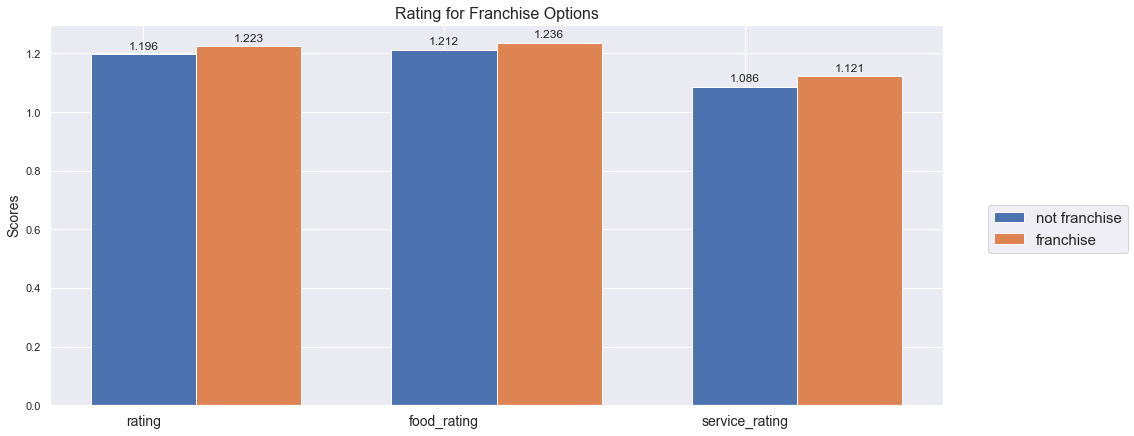

In [141]:
# Franchise Rating
# Franchise has a higher score than non-franchise per each rating type.

franchise_rating = pd.merge(ratings,  r_general[['placeID', 'franchise']], on = 'placeID', how = 'left')
franchise_rating_mean = franchise_rating.groupby(['franchise'])['rating', 'food_rating', 'service_rating'].mean().T

fig, ax = plt.subplots(figsize = (16,7))
rects1 = plt.bar(indx + 0.00, franchise_rating_mean.iloc[:,0],bar_width, label = 'not franchise')
rects2 = plt.bar(indx + 0.35, franchise_rating_mean.iloc[:,1],bar_width, label = 'franchise')
ax.set_ylabel('Scores', fontsize = 14)
ax.set_title('Rating for Franchise Options', fontsize = 16)
ax.set_xticks(indx)
ax.set_xticklabels(subjects, fontsize = 14)
ax.legend(fontsize = 15, loc = (1.05, 0.4))

autolabel(rects1)
autolabel(rects2)

plt.show()

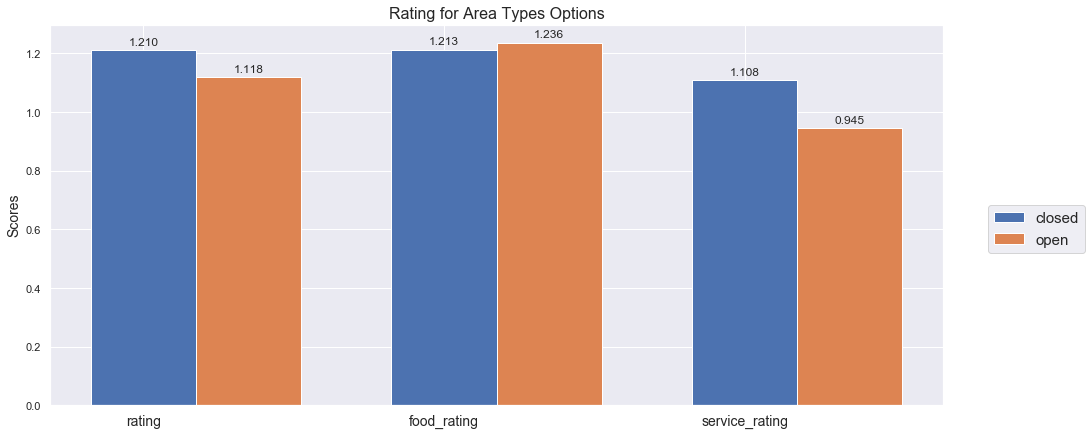

In [142]:
# Area Rating
# There is a siginificant difference between close and open area for general and service ratings.
area_rating = pd.merge(ratings,  r_general[['placeID', 'area']], on = 'placeID', how = 'left')
area_rating_mean = area_rating.groupby(['area'])['rating', 'food_rating', 'service_rating'].mean().T

fig, ax = plt.subplots(figsize = (16,7))
rects1 = plt.bar(indx + 0.00, area_rating_mean.iloc[:,0],bar_width, label = 'closed')
rects2 = plt.bar(indx + 0.35, area_rating_mean.iloc[:,1],bar_width, label = 'open')
ax.set_ylabel('Scores', fontsize = 14)
ax.set_title('Rating for Area Types Options', fontsize = 16)
ax.set_xticks(indx)
ax.set_xticklabels(subjects, fontsize = 14)
ax.legend(fontsize = 15, loc = (1.05, 0.4))

autolabel(rects1)
autolabel(rects2)

plt.show()

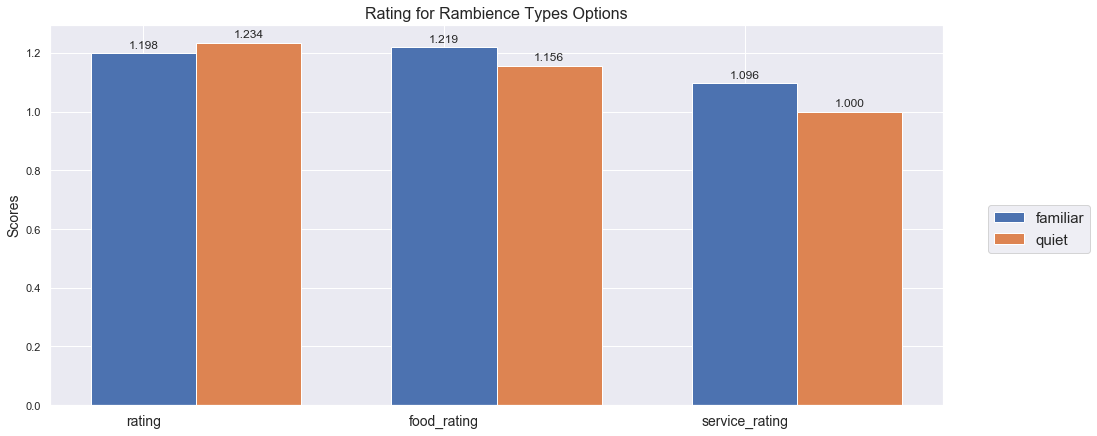

In [144]:
# Rambience Rating

rambience_rating = pd.merge(ratings,  r_general[['placeID', 'Rambience']], on = 'placeID', how = 'left')
rambience_rating_mean = rambience_rating.groupby(['Rambience'])['rating', 'food_rating', 'service_rating'].mean().T

fig, ax = plt.subplots(figsize = (16,7))
rects1 = plt.bar(indx + 0.00, rambience_rating_mean.iloc[:,0],bar_width, label = 'familiar')
rects2 = plt.bar(indx + 0.35, rambience_rating_mean.iloc[:,1],bar_width, label = 'quiet')
ax.set_ylabel('Scores', fontsize = 14)
ax.set_title('Rating for Rambience Types Options', fontsize = 16)
ax.set_xticks(indx)
ax.set_xticklabels(subjects, fontsize = 14)
ax.legend(fontsize = 15, loc = (1.05, 0.4))

autolabel(rects1)
autolabel(rects2)

plt.show()

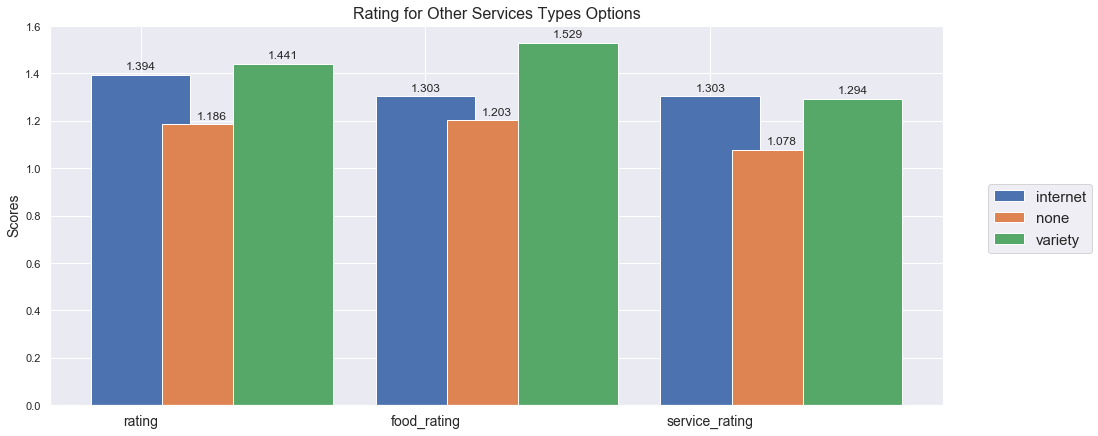

In [145]:
# Other_services Rating
# Restaurants without any additional services provided have the lowest rating in all ratings and the difference is really 
#significant.

other_services_rating = pd.merge(ratings,  r_general[['placeID', 'other_services']], on = 'placeID', how = 'left')
other_services_rating_mean = other_services_rating.groupby(['other_services'])['rating', 'food_rating', 
                                                                               'service_rating'].mean().T

fig, ax = plt.subplots(figsize = (16,7))
rects1 = plt.bar(indx + 0.00, other_services_rating_mean.iloc[:,0],bar_width, label = 'internet')
rects2 = plt.bar(indx + 0.25, other_services_rating_mean.iloc[:,1],bar_width, label = 'none')
rects3 = plt.bar(indx + 0.5, other_services_rating_mean.iloc[:,2],bar_width, label = 'variety')
ax.set_ylabel('Scores', fontsize = 14)
ax.set_title('Rating for Other Services Types Options', fontsize = 16)
ax.set_xticks(indx)
ax.set_xticklabels(subjects, fontsize = 14)
ax.legend(fontsize = 15, loc = (1.05, 0.4))

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.show()

In [ ]:
# This section helps to understand the data easier rather than checking all rows in different dataset. It's easier to combine
# two or more dataset on the required columns and check for any correlation.

# The next section 'Modelling' is to build models to predict how restaurants will be evaluated by people basing on restaurants 
# features.